<a href="https://colab.research.google.com/github/RoshitRana/Concepts_and_Technology_AI/blob/main/2414227_RoshitRana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

REGRESSION TASK

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = "/content/drive/MyDrive/AI_CourseWork/Regression.csv"

# Load dataset
df = pd.read_csv(file_path)

# Display dataset information
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670 entries, 0 to 1669
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                1670 non-null   object 
 1   Year                   1670 non-null   int64  
 2   Population             1670 non-null   int64  
 3   country_code           1670 non-null   object 
 4   health_exp             1327 non-null   float64
 5   life_expect            1467 non-null   float64
 6   maternal_mortality     1106 non-null   float64
 7   infant_mortality       1494 non-null   float64
 8   neonatal_mortality     1494 non-null   float64
 9   under_5_mortality      1494 non-null   float64
 10  prev_hiv               1161 non-null   float64
 11  inci_tuberc            1660 non-null   float64
 12  prev_undernourishment  1317 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 169.7+ KB
None
       Country  Year  Population country_cod

Data Cleaning

In [ ]:
# Drop non-numeric columns
df_numeric = df.drop(columns=["Country", "Year"], errors='ignore')

# Check the first few rows after removal
df.head()

,Year,Population,health_exp,life_expect,maternal_mortality,infant_mortality,neonatal_mortality,under_5_mortality,prev_hiv,inci_tuberc,prev_undernourishment
0,2014,56805036,9.528878,62.545000,785.000000,56.2,43.5,75.3,0.100000,189.0,19.300000
1,2014,127571863,6.434511,78.407000,7.000000,8.8,5.9,9.9,0.100000,16.0,4.500000
2,2014,147582820,6.547214,75.110000,86.000000,22.0,15.8,25.7,0.100000,72.0,2.700000
3,2014,133274038,6.773080,71.646832,156.199819,3.5,1.9,3.8,1.847976,9.4,9.685118
4,2014,35838921,2.434129,60.040000,292.000000,60.3,31.5,92.5,1.900000,370.0,13.000000


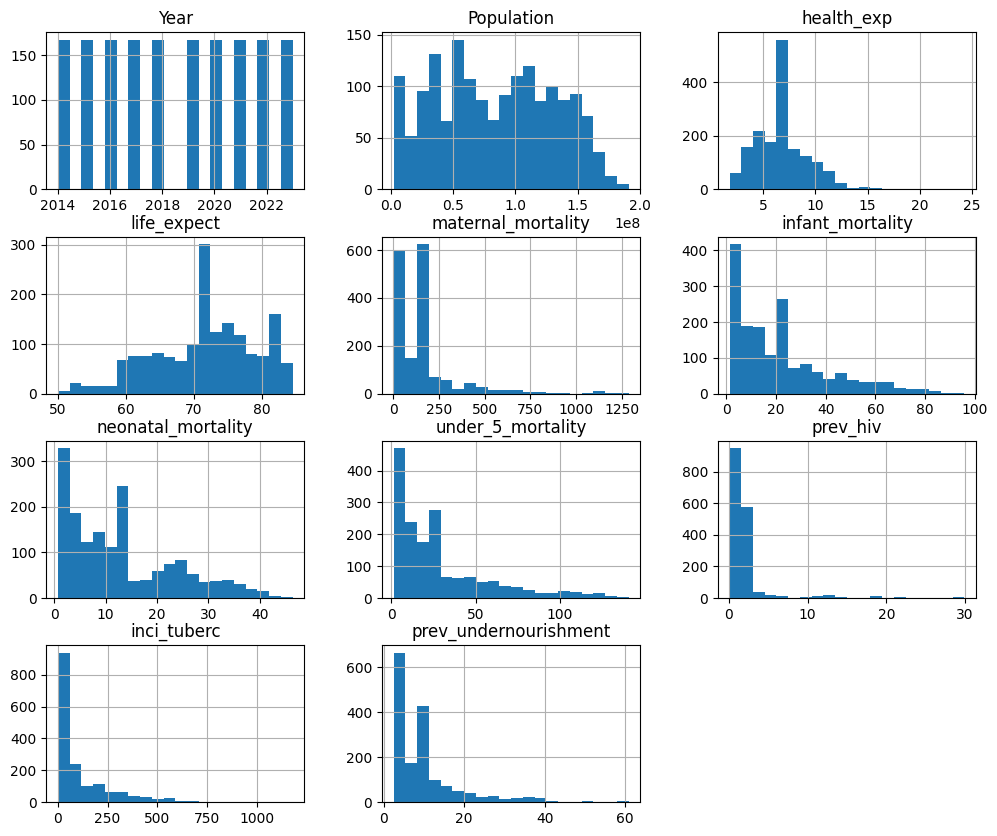

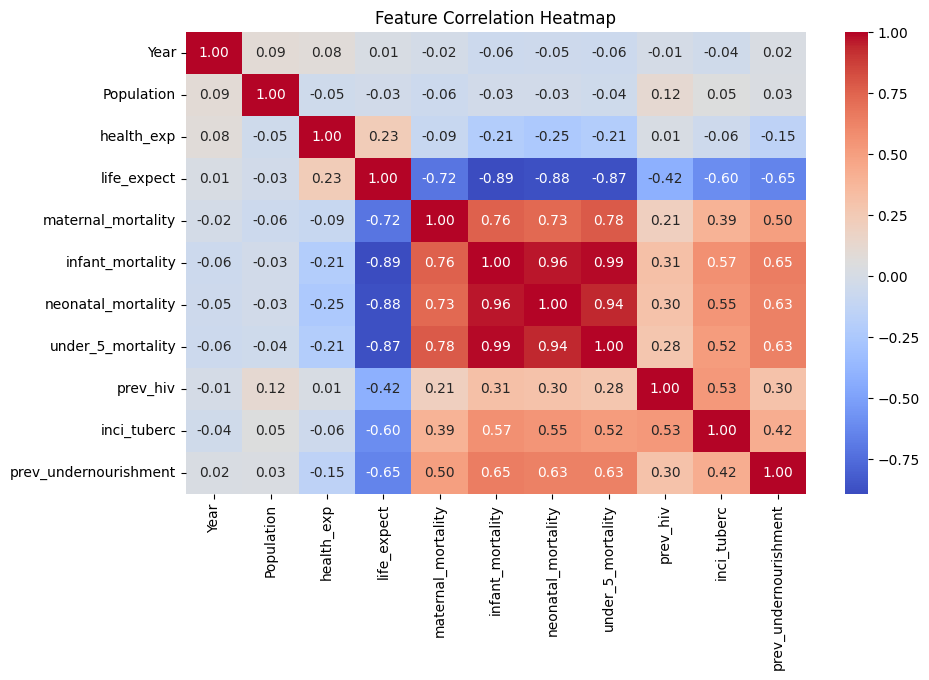

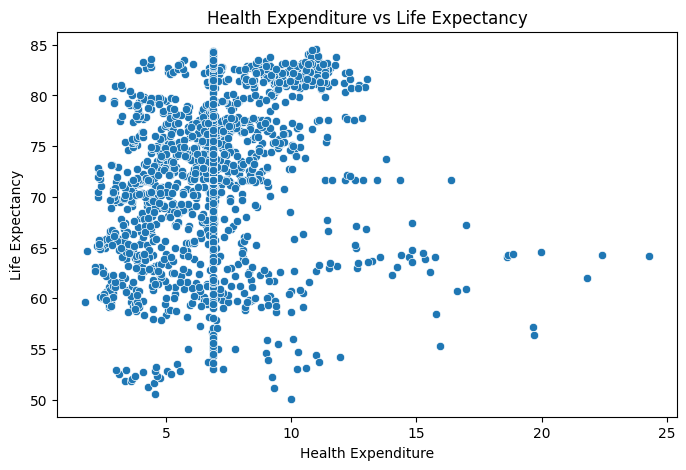

In [ ]:
# Visualizing feature distributions
df.hist(figsize=(12, 10), bins=20)
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# Scatter plot: Health expenditure vs Life Expectancy
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['health_exp'], y=df['life_expect'])
plt.xlabel("Health Expenditure")
plt.ylabel("Life Expectancy")
plt.title("Health Expenditure vs Life Expectancy")
plt.show()


Splitting Dataset for Model Training

In [ ]:
# Define feature variables (X) and target variable (y)
X = df.drop(columns=['life_expect'])  # Features
y = df['life_expect']  # Target variable

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")


Training set size: (1336, 10)
Testing set size: (334, 10)


Build and Evaluate Regression Models

In [ ]:
# Train Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Train Random Forest Regression Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Evaluate models
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n {model_name} Performance Metrics:")
    print(f"MAE: {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")
    print(f"R² Score: {r2_score(y_true, y_pred):.2f}")

evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest Regression")



 Linear Regression Performance Metrics:
MAE: 2.32
RMSE: 3.01
R² Score: 0.84

 Random Forest Regression Performance Metrics:
MAE: 0.91
RMSE: 1.43
R² Score: 0.96


Hyper-parameter Optimization using GridSearchCV

In [ ]:
# Define hyperparameters for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, None]
}

# Perform GridSearchCV
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Train final model with best hyperparameters
best_rf_model = RandomForestRegressor(**grid_search.best_params_, random_state=42)
best_rf_model.fit(X_train, y_train)

# Evaluate final model
y_pred_best_rf = best_rf_model.predict(X_test)
evaluate_model(y_test, y_pred_best_rf, "Optimized Random Forest")


Best Hyperparameters: {'max_depth': None, 'n_estimators': 200}

 Optimized Random Forest Performance Metrics:
MAE: 0.91
RMSE: 1.43
R² Score: 0.96


Feature Selection (Using Recursive Feature Elimination - RFE)

In [ ]:
# Use RFE with Linear Regression
rfe = RFE(lr_model, n_features_to_select=5)
rfe.fit(X_train, y_train)

# Select important features
selected_features = X_train.columns[rfe.support_]
print("Selected Features for Regression:", selected_features)

Selected Features for Regression: Index(['Year', 'health_exp', 'infant_mortality', 'neonatal_mortality',
       'prev_hiv'],
      dtype='object')


Final Model Training with Selected Features

In [ ]:
# Use only selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Train final model
final_rf_model = RandomForestRegressor(**grid_search.best_params_, random_state=42)
final_rf_model.fit(X_train_selected, y_train)

# Evaluate final model
y_pred_final = final_rf_model.predict(X_test_selected)
evaluate_model(y_test, y_pred_final, "Final Random Forest with Feature Selection")



 Final Random Forest with Feature Selection Performance Metrics:
MAE: 1.23
RMSE: 1.86
R² Score: 0.94


 Check Feature Importance

In [ ]:
# Get feature importance scores
feature_importances = final_rf_model.feature_importances_

# Convert to DataFrame
feature_importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': feature_importances})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)


              Feature  Importance
2    infant_mortality    0.852328
1          health_exp    0.049076
4            prev_hiv    0.046132
3  neonatal_mortality    0.040510
0                Year    0.011954


Visualize Feature Importance

<ipython-input-28-c9810bc941b7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'], palette='viridis')


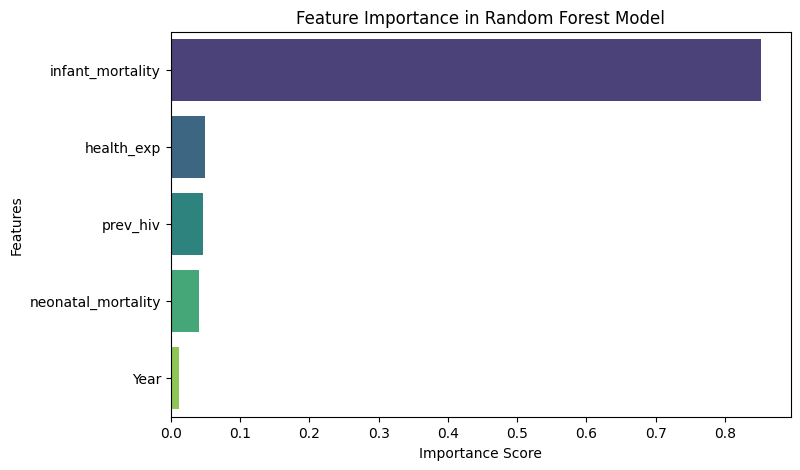

In [ ]:
# Plot feature importance
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'], palette='viridis')
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest Model")
plt.show()


Scatter plots, Residual plots, and Error distribution graphs

Root Mean Squared Error (RMSE): 1.86
Mean Absolute Error (MAE): 1.23
R-squared (R²) Score: 0.9380


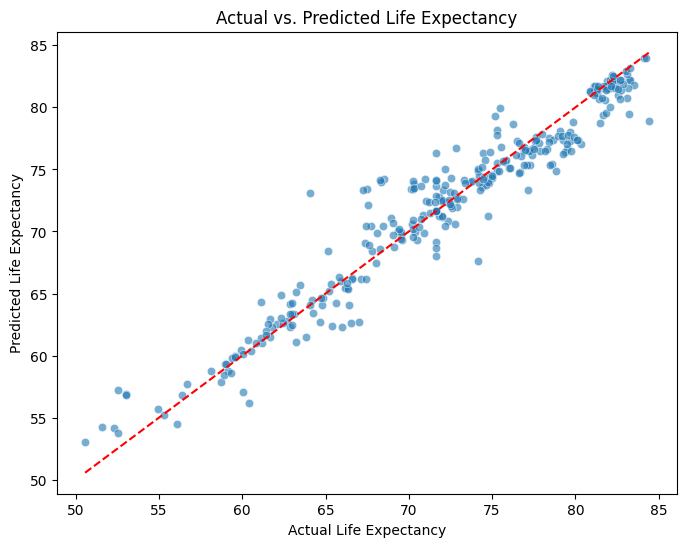

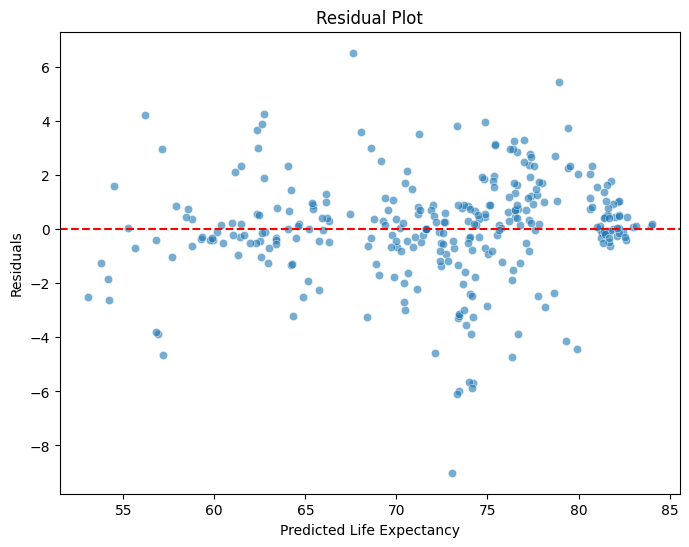

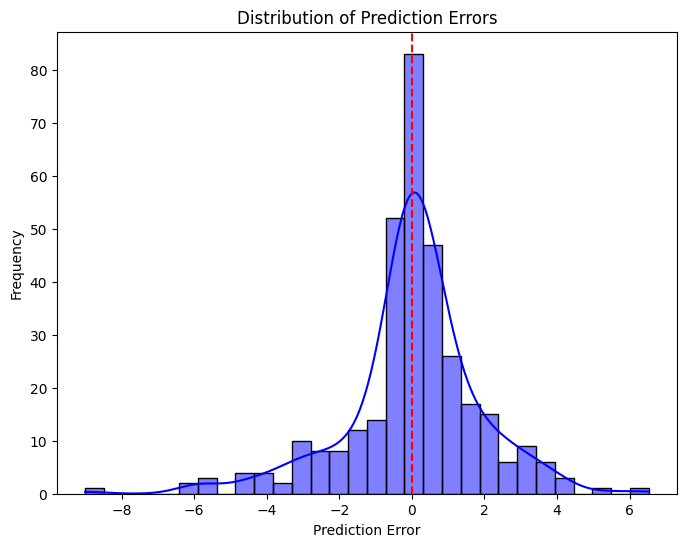

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred =  final_rf_model.predict(X_test_selected)

# Function to plot model performance
def plot_model_performance(y_test, y_pred):
    # Scatter Plot: Actual vs. Predicted
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed')  # Perfect predictions line
    plt.xlabel("Actual Life Expectancy")
    plt.ylabel("Predicted Life Expectancy")
    plt.title("Actual vs. Predicted Life Expectancy")
    plt.show()

    # Residual Plot
    residuals = y_test - y_pred
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
    plt.axhline(y=0, color='red', linestyle='dashed')  # Zero residual line
    plt.xlabel("Predicted Life Expectancy")
    plt.ylabel("Residuals")
    plt.title("Residual Plot")
    plt.show()

    # Error Distribution
    plt.figure(figsize=(8, 6))
    sns.histplot(residuals, bins=30, kde=True, color="blue")
    plt.axvline(x=0, color='red', linestyle='dashed')  # Zero error line
    plt.xlabel("Prediction Error")
    plt.ylabel("Frequency")
    plt.title("Distribution of Prediction Errors")
    plt.show()

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print model evaluation metrics
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²) Score: {r2:.4f}")

# Plot the visualizations
plot_model_performance(y_test, y_pred)


Save the Model Using Joblib

In [ ]:
import joblib

# Save the model to a file
joblib.dump(final_rf_model, "final_life_expectancy_model.pkl")

# Save selected features for later use
joblib.dump(selected_features, "selected_features.pkl")


['selected_features.pkl']

 Load & Use the Model Later

In [ ]:
# Load the model
loaded_model = joblib.load("final_life_expectancy_model.pkl")

# Load selected features
selected_features = joblib.load("selected_features.pkl")

# Make new predictions
new_predictions = loaded_model.predict(X_test_selected)
print(new_predictions[:10])  # Print first 10 predictions


[65.72381555 71.33432488 79.39642317 65.40767    71.64683168 56.80093
 73.6156839  71.117495   81.98787805 71.48023598]


Model Performance:
Linear Regression Performance Metrics:
MAE: 2.32
RMSE: 3.01
R² Score: 0.84

 Random Forest Regression Performance Metrics:
MAE: 0.91
RMSE: 1.43
R² Score: 0.96


Random Forest Regression model performs significantly better than the Linear Regression model.

Mean Absolute Error (MAE)

Linear Regression: 2.32
Random Forest: 0.91 (lower is better)

Root Mean Squared Error (RMSE)
Linear Regression: 3.01
Random Forest: 1.43 (lower is better)


R² Score (Coefficient of Determination)
Linear Regression: 0.84
Random Forest: 0.96 (closer to 1 is better)
